Baaloudj Hakim

# 3I026 - Intelligence artificielle & Data science

# TP 4 - Perceptron et Kernel tricks

In [420]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import random

# PROJET CONSEIL

1ere partie 
    L'analytics :

        1/ problématique
        2/ méthodologie
        3/ implémentation
        4/ experimentation
        5/ graphique/histo/google visualisation/plotlib nuage de mot etc (faire des choses marrante)
        6/ je réflechis -> conclusion
        
2eme partie
    Prediction : 
    
    Problématique : qui va gagner ?
    fonction(equipe1,equie2) -> y // +1 0 -1 (win,nul,loose)
    
    coder les equipes sous forme de vecteurs, par exemple le vecteur de l'equipe 1 est le set des caracteristique décrivant l'equipe 1 (mais décrivant de manière pertinente, pas d'infos inutile pour la prédiction qu'on veut faire)
    
    questions a se poser
    
    1/ quel représentation pour 1 equipe ?
    2/ quel représentation pour 2 equipes ? = 1 match
    3/ quels ensemble train/test ? (découpage temporelle) exemple : j'entraine mon modele sur 2008/2012, et je le test sur 2012/2013

In [421]:
class LabeledSet:  
    
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self, vector, label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x,vector))
            self.y = np.vstack((self.y,label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
        
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
            
    #Renvoie la valeur de y_i
    def getY(self, i):
        return self.y[i]

In [422]:
class Classifier:
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        raise NotImplementedError("Please Implement this method")
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self, labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la qualité du système 
    def accuracy(self, dataset):
        nb_ok = 0
        for i in range(dataset.size()):
            output = self.predict(dataset.getX(i))
            if (output * dataset.getY(i)[0] > 0):
                nb_ok = nb_ok + 1
        acc = nb_ok / (dataset.size() * 1.0)
        return acc

In [423]:
def plot_frontiere(set, classifier, step=20):
    mmax = set.x.max(0)
    mmin = set.x.min(0)
    x1grid, x2grid = np.meshgrid(np.linspace(mmin[0], mmax[0], step), np.linspace(mmin[1], mmax[1], step))
    grid = np.hstack((x1grid.reshape(x1grid.size, 1), x2grid.reshape(x2grid.size, 1)))
    
    # calcul de la prediction pour chaque point de la grille
    res = np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res = res.reshape(x1grid.shape)
    # tracé des frontieres
    plt.contourf(x1grid, x2grid, res, colors=["red", "cyan"], levels=[-1000,0,1000], linewidth=2)

In [424]:
import matplotlib.pyplot as plt
# Permet d'afficher les figures directement dans le notebook:
%matplotlib inline

def plot2DSet(dataset):
    plt.scatter(dataset.x[0:int(dataset.size()/2),0],dataset.x[0:int(dataset.size()/2),1],marker='o')
    plt.scatter(dataset.x[int(dataset.size()/2):dataset.size(),0],dataset.x[int(dataset.size()/2):dataset.size(),1],marker='x')

In [425]:
class KernelBiais():
    
    def __init__(self,dimension):
        self.dim = dimension
    
    def __call__(self,x):
        return np.append(x,1)
    
    def output_dim(self):
        return self.dim + 1

In [426]:
class KernelId():
    
    def __init__(self,dimension):
        self.dim = dimension
    
    def __call__(self,x):
        return x
    
    def output_dim(self):
        return self.dim

In [445]:
class KernelPoly():
    
    def __init__(self,dimension):
        self.dim = dimension
        
    def __call__(self,x):
        tmp = x[:]
        np.append(x,pow(x[0],2))
        for i in range(1,len(tmp)):
            if(i == len(tmp)-1):
                np.append(x,np.dot(tmp[i],tmp[i]))
            else:
                np.append(x,np.dot(tmp[i],tmp[i+1]))
        np.append(x,1)
        return x
    
    def output_dim(self):
        return self.dim + self.dim + 1

In [446]:
kp = KernelPoly(2)

print(kp([2,3,3]))
print(kp.output_dim())

[2, 3, 3]
[2, 3, 3]
5


# Données XOR et test du kernel tricks

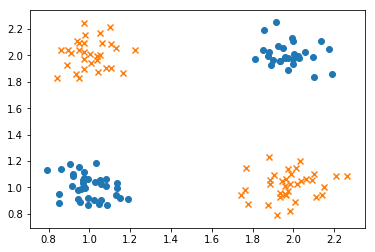

In [377]:
def split(mset,proportion): #fonction qui va me découper mon ensemble en 2 partie, suivant le % 'x'
    train_set=LabeledSet(mset.getInputDimension())
    test_set=LabeledSet(mset.getInputDimension())
    for i in range(mset.size()):
        if (random.random()<proportion):
            train_set.addExample(mset.getX(i),mset.getY(i)[0])            
        else:
            test_set.addExample(mset.getX(i),mset.getY(i)[0])

    return train_set,test_set

#1: Generer le dataset

#2: split train/text
myset=LabeledSet(2)
mean = [2,2]
cov = [[0.01,0],[0,0.01]]
d=np.random.multivariate_normal(mean,cov,70)
for i in range(len(d)):
    myset.addExample(d[i],+1)

mean = [1,1]
cov = [[0.01,0],[0,0.01]]
d=np.random.multivariate_normal(mean,cov,70)
for i in range(len(d)):
    myset.addExample(d[i],+1)
    
mean = [2,1]
cov = [[0.01,0],[0,0.01]]
d=np.random.multivariate_normal(mean,cov,70)
for i in range(len(d)):
    myset.addExample(d[i],-1)

mean = [1,2]
cov = [[0.01,0],[0,0.01]]
d=np.random.multivariate_normal(mean,cov,70)
for i in range(len(d)):
    myset.addExample(d[i],-1)


# mean = [1, 0]    
# cov = [[0.01,0],[0,0.01]]
# n1_tr,n1_ts = split(np.random.multivariate_normal(mean,cov,70),70)

# mean = [0, 1]   
# cov = [[0.01,0],[0,0.01]]
# n2_tr,n2_ts = split(np.random.multivariate_normal(mean,cov,70),70)
train_set,test_set=split(myset,0.5)

plot2DSet(train_set)





In [390]:
class Perceptron(Classifier):
    
    def __init__(self, learning_rate,kernel):
        self.learning_rate = learning_rate
        self.kernel = kernel
        self.theta = np.random.randn(1,kernel.output_dim())
        
    def train(self,dataset):
        for i in range(dataset.size()):
            rand = random.uniform(0, dataset.size()) #la valeur random qui va servir a piocher dans le dataset un vecteur random
            vec_random = (dataset.getX(int(rand)),dataset.getY(int(rand))) #je pioche un vecteur random et son label associé
            
            X = self.kernel(vec_random[0]) #je stock le vecteur modifié pour modifier theta après
            prediction = self.predict(vec_random[0])
            if((prediction * vec_random[1][0]) <= 0):     
                self.theta = self.theta+self.learning_rate* X * vec_random[1][0]
            
            return self.accuracy(dataset)
    
    def predict(self,x):
        return np.dot(self.theta,self.kernel(x))[0]

In [443]:
kernelB = KernelPoly(2)
perc = Perceptron(0.001,kernelB)

acc=[]
for i in range(1000):
    acc.append(perc.train(train_set))
print(acc[-1])
plt.plot(acc)

plt.show()
plot_frontiere(train_set,perc,step=20)
plot2DSet(train_set)



ValueError: shapes (1,5) and (2,) not aligned: 5 (dim 1) != 2 (dim 0)

[1 2 1]
